<a href="https://colab.research.google.com/github/rajguru9889/ML_LAB/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

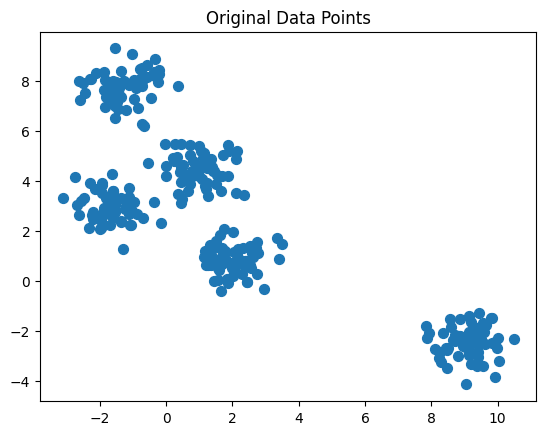

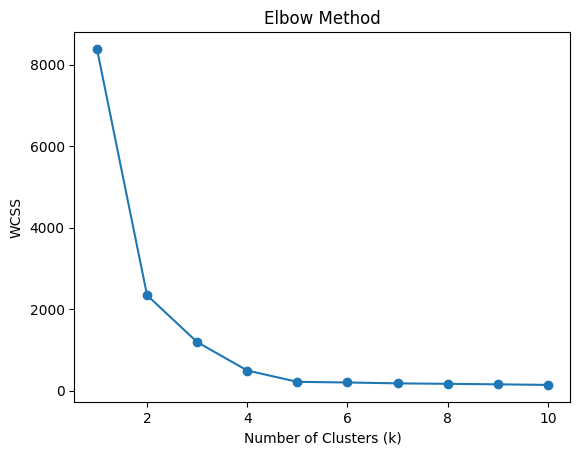

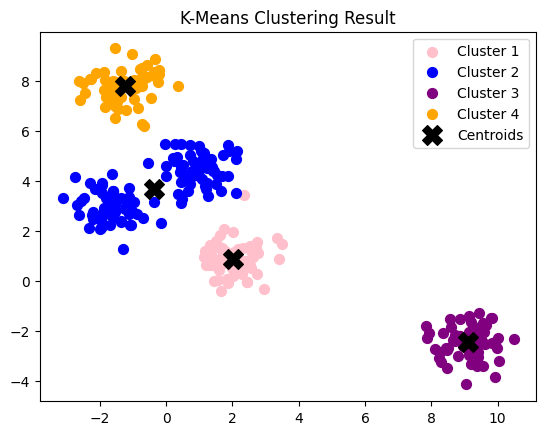

In [28]:
#K-Means algorithm with elbow method
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Step 1: Generate sample data
X, y = make_blobs(n_samples=305, centers=5, cluster_std=0.60, random_state=0)

# Step 2: Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Original Data Points")
plt.show()

# Step 3: Elbow Method to find optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Step 4: Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Step 5: Apply K-Means with optimal clusters (let’s assume k=4)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 6: Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='pink', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='purple', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='orange', label='Cluster 4')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.title('K-Means Clustering Result')
plt.legend()
plt.show()


In [29]:
import numpy as np
from scipy.spatial import distance
from sklearn.metrics import jaccard_score

# Example data points (vectors)
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print("Data Points:")
print("x =", x)
print("y =", y)

# Euclidean Distance
euclidean = np.linalg.norm(x - y)
print("1. Euclidean Distance:", euclidean)

# Manhattan Distance
manhattan = np.sum(np.abs(x - y))
print("2. Manhattan Distance:", manhattan)

#  Cosine Similarity
cosine_similarity = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
print("3. Cosine Similarity:", cosine_similarity)

#  Minkowski Distance (p=3)
p = 3
minkowski = distance.minkowski(x, y, p)
print(f"4. Minkowski Distance (p={p}):", minkowski)

# Jaccard Index
# For binary or set-like data
# Convert to binary example
x_bin = np.array([1, 1, 0, 1, 0, 0])
y_bin = np.array([1, 0, 0, 1, 1, 0])
jaccard = jaccard_score(x_bin, y_bin)
print("5. Jaccard Index:", jaccard)


Data Points:
x = [1 2 3]
y = [4 5 6]
1. Euclidean Distance: 5.196152422706632
2. Manhattan Distance: 9
3. Cosine Similarity: 0.9746318461970762
4. Minkowski Distance (p=3): 4.3267487109222245
5. Jaccard Index: 0.5


Hierarchical Clustering

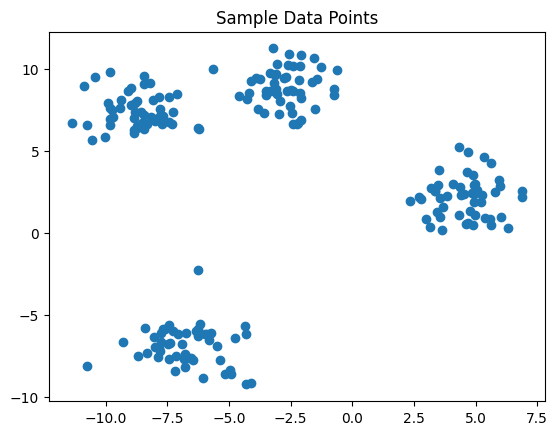

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, Birch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Generate synthetic dataset
X, y = make_blobs(n_samples=200, centers=4, random_state=42, cluster_std=1.2)

plt.scatter(X[:, 0], X[:, 1])
plt.title("Sample Data Points")
plt.show()


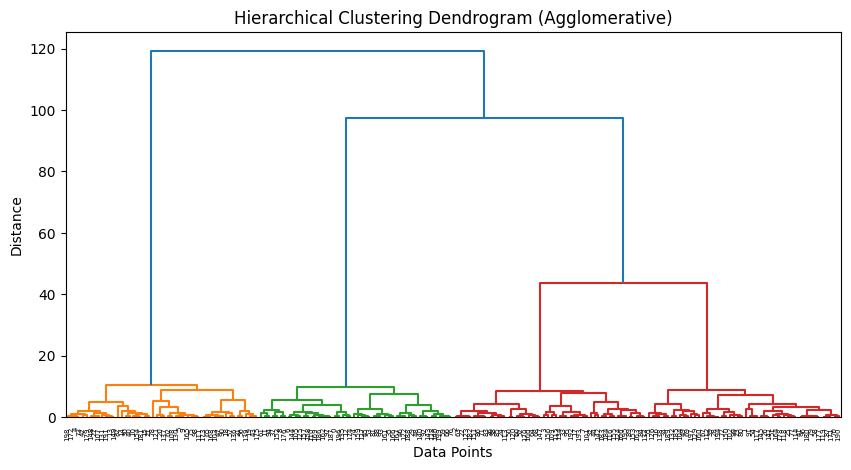

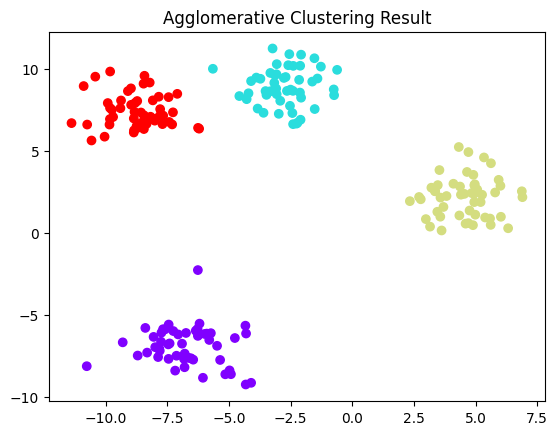

In [31]:
#Agglomerative Clustering
# Create the linkage matrix for dendrogram
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Agglomerative)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Perform Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = agglo.fit_predict(X)

# Visualize results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering Result")
plt.show()


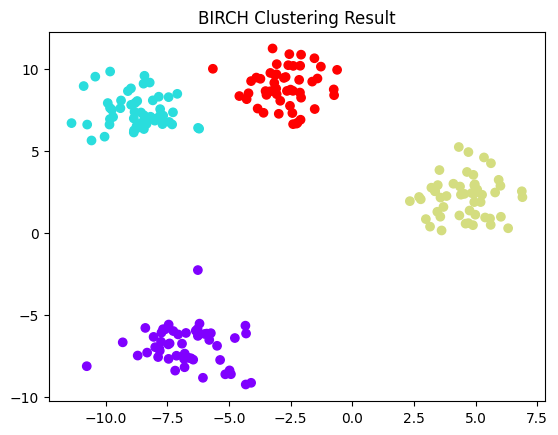

In [32]:
# BIRCH automatically builds a hierarchical tree
birch_model = Birch(n_clusters=4)
birch_labels = birch_model.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=birch_labels, cmap='rainbow')
plt.title("BIRCH Clustering Result")
plt.show()


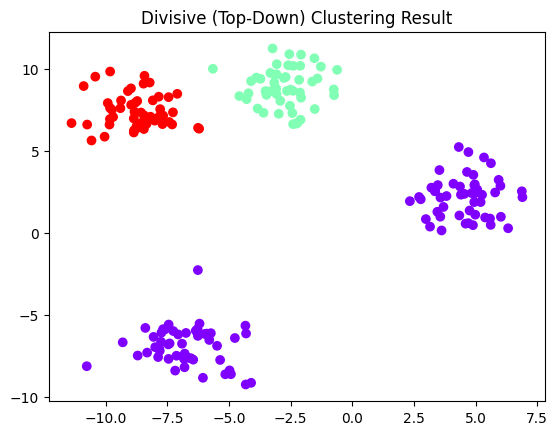

In [33]:
#Divisive Clustering
from sklearn.cluster import KMeans
import numpy as np

def divisive_clustering(X, max_clusters=4):
    clusters = [np.arange(len(X))]
    labels = np.zeros(len(X), dtype=int)
    cluster_id = 0

    while len(clusters) < max_clusters:
        largest_cluster_indices = clusters.pop(np.argmax([len(c) for c in clusters]))

        largest_cluster_data = X[largest_cluster_indices]

        # Split using KMeans (k=2) on the data from the largest cluster
        kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
        split_labels = kmeans.fit_predict(largest_cluster_data)

        # Add new clusters
        clusters.append(largest_cluster_indices[split_labels == 0])
        clusters.append(largest_cluster_indices[split_labels == 1])

        labels[largest_cluster_indices[split_labels == 0]] = len(clusters) - 2
        labels[largest_cluster_indices[split_labels == 1]] = len(clusters) - 1

    return labels

div_labels = divisive_clustering(X, max_clusters=4)

plt.scatter(X[:, 0], X[:, 1], c=div_labels, cmap='rainbow')
plt.title("Divisive (Top-Down) Clustering Result")
plt.show()

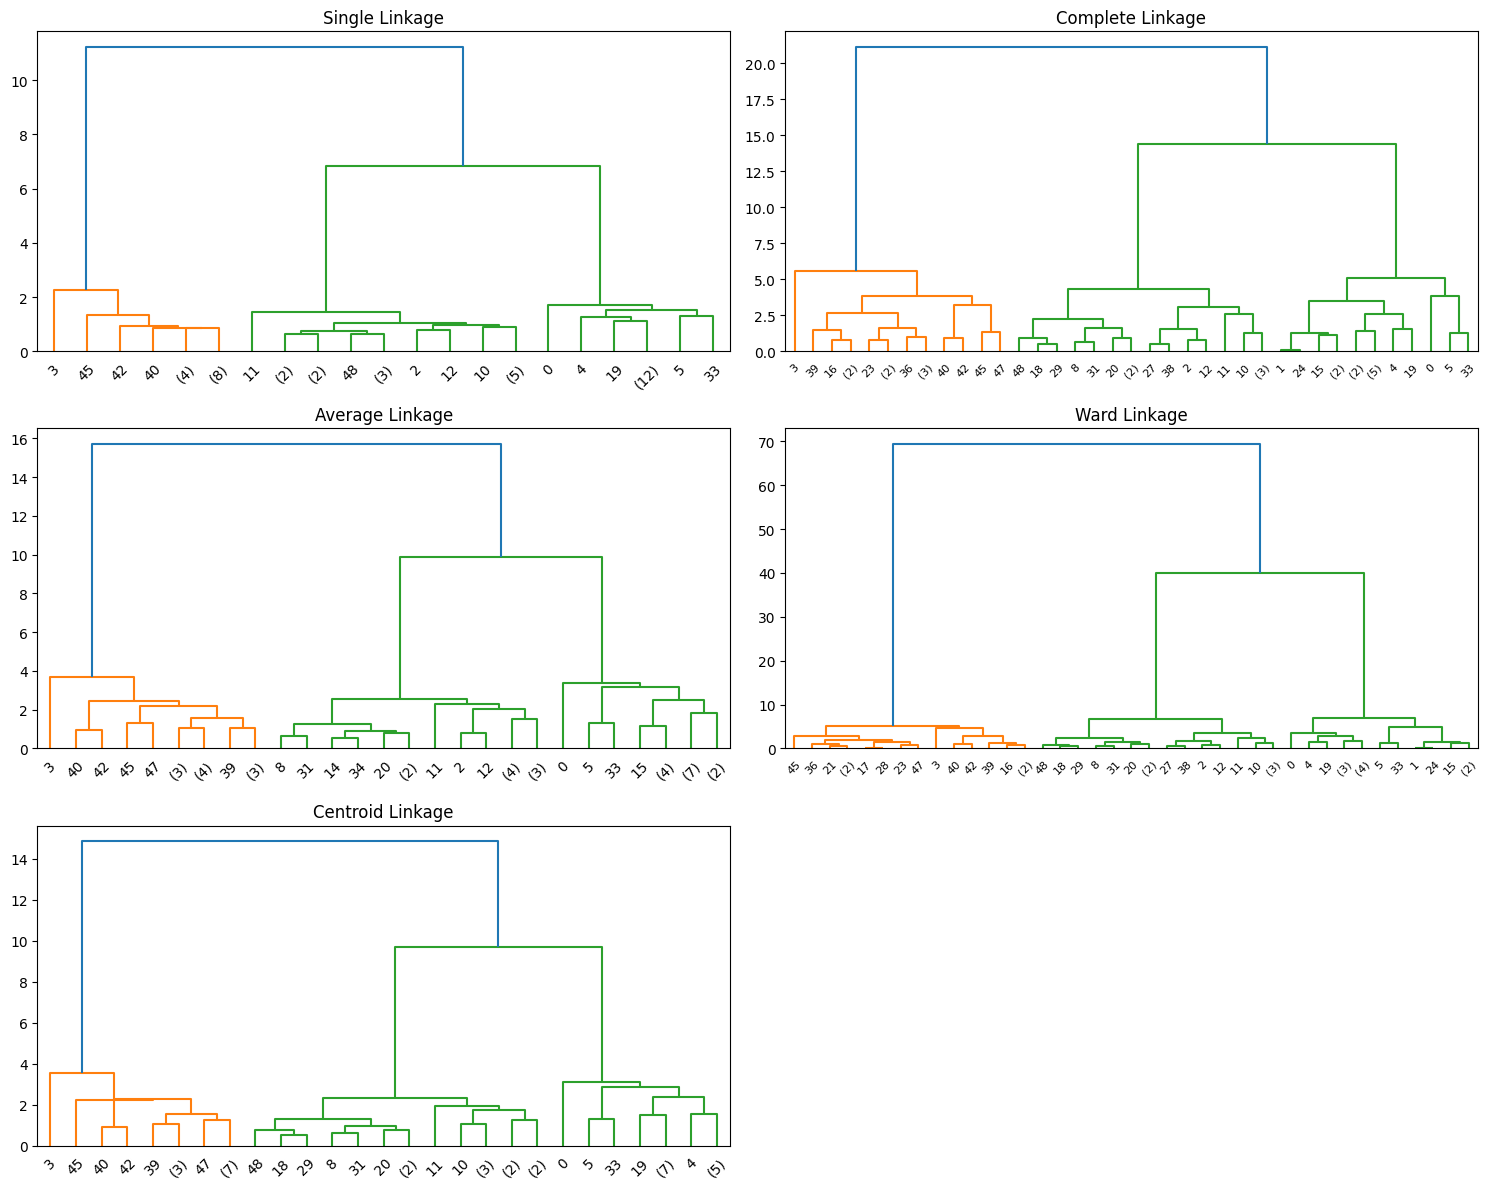

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram

#sample data
X, y = make_blobs(n_samples=50, centers=3, random_state=42, cluster_std=1.3)

#Define all linkage methods
methods = ['single', 'complete', 'average', 'ward', 'centroid']

#Plot dendrogram for each linkage type
plt.figure(figsize=(15, 12))

for i, method in enumerate(methods, 1):
    plt.subplot(3, 2, i)
    Z = linkage(X, method=method)
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title(f'{method.capitalize()} Linkage')

plt.tight_layout()
plt.show()


DBscan

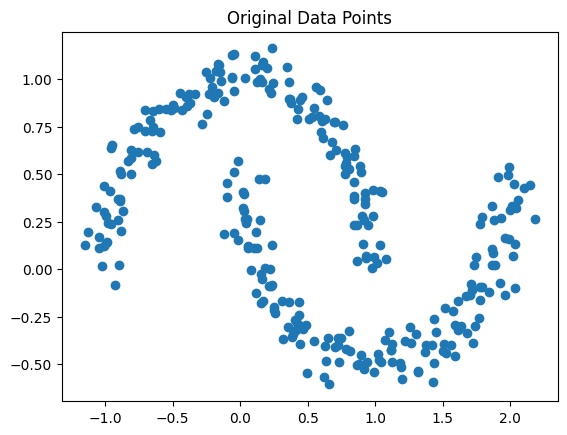

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Create sample non-linear data (two interleaving half circles)
X, y = make_moons(n_samples=300, noise=0.07, random_state=42)

# Visualize original data
plt.scatter(X[:, 0], X[:, 1])
plt.title("Original Data Points")
plt.show()


In [36]:
# Apply DBSCAN
# eps = maximum distance between two samples to be considered neighbors
# min_samples = minimum number of points to form a dense region
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Unique labels (-1 means noise)
print("Cluster Labels:", np.unique(labels))


Cluster Labels: [0 1]


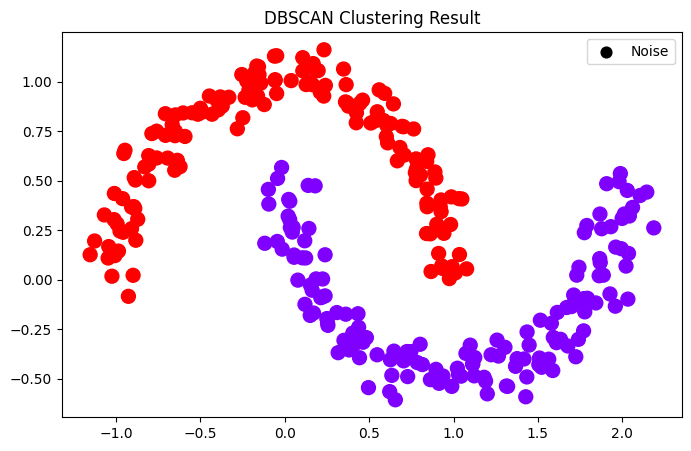

In [37]:
# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=100)

# Mark noise points in black
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='black', s=60, label='Noise')

plt.title("DBSCAN Clustering Result")
plt.legend()
plt.show()


Spectral Clustering

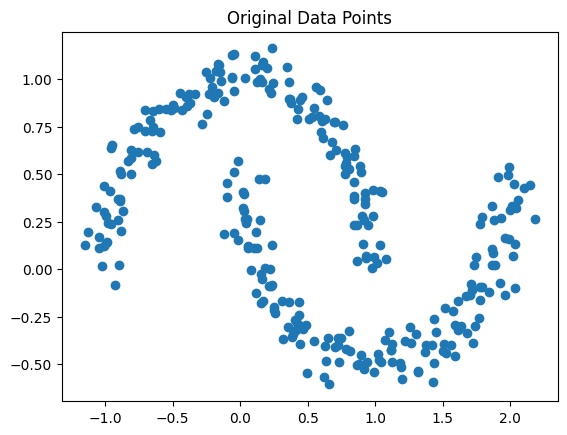

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

# Create non-linear data
X, y = make_moons(n_samples=300, noise=0.07, random_state=42)

# Plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.title("Original Data Points")
plt.show()


In [39]:
# Apply Spectral Clustering
spectral = SpectralClustering(
    n_clusters=2,
    affinity='nearest_neighbors',
    assign_labels='kmeans',
    random_state=42
)

labels = spectral.fit_predict(X)

# Print labels
print("Cluster Labels:", np.unique(labels))


Cluster Labels: [0 1]


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


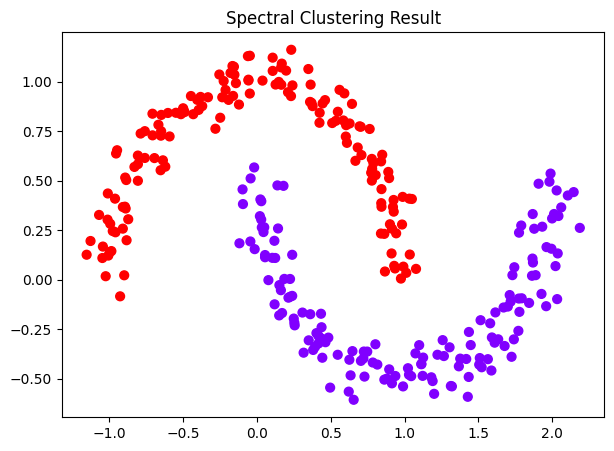

In [40]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=40)
plt.title("Spectral Clustering Result")
plt.show()
